In [1]:
#Plotter for Higgs Combine FitDiagnostics and for MonoZ datacards
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
import pandas as pd
import os
import ROOT
import uproot
import uproot_methods
import physt
from scipy import interpolate
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch
from scipy.optimize import curve_fit, fsolve
from matplotlib.patches import Ellipse, Polygon

plt.style.use('physics.mplstyle')

Welcome to JupyROOT 6.20/02


In [2]:
#open the file and grab the histograms
fn = '/eos/cms/store/group/comm_dqm/DQMGUI_data/Run2018/StreamExpress/R0003250xx/DQM_V0010_R000325000__StreamExpress__Run2018D-Express-v1__DQMIO.root'
f = uproot.open(fn)

histograms = f["DQMData/Run 325000/L1T/Run summary/L1TStage2EMTF"].allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
#histograms = f["DQMData/Run 325000/CSC/Run summary/CSCOfflineMonitor"].allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
#histograms = f["DQMData/Run 325000/CSC/Run summary/Summary"].allitems( filterclass=lambda cls: issubclass(cls, uproot_methods.classes.TH1.Methods))
for name, roothist in histograms:
    print(name)

b'RPCvsEMTFTrackMode;1'
b'cscDQMOccupancy;1'
b'cscLCTBX;1'
b'cscLCTOccupancy;1'
b'emtfErrors;1'
b'emtfTrackBX;1'
b'emtfTrackEta;1'
b'emtfTrackMode;1'
b'emtfTrackOccupancy;1'
b'emtfTrackPhi;1'
b'emtfTrackPt;1'
b'emtfTrackQuality;1'
b'emtfTrackQualityVsMode;1'
b'emtfTracknHits;1'
b'emtfnTracks;1'
b'mpcLinkErrors;1'
b'mpcLinkGood;1'
b'rpcHitBX;1'
b'rpcHitOccupancy;1'
b'CSCInput/cscChamberStripMENeg11a;1'
b'CSCInput/cscChamberStripMENeg11b;1'
b'CSCInput/cscChamberStripMENeg12;1'
b'CSCInput/cscChamberStripMENeg13;1'
b'CSCInput/cscChamberStripMENeg21;1'
b'CSCInput/cscChamberStripMENeg22;1'
b'CSCInput/cscChamberStripMENeg31;1'
b'CSCInput/cscChamberStripMENeg32;1'
b'CSCInput/cscChamberStripMENeg41;1'
b'CSCInput/cscChamberStripMENeg42;1'
b'CSCInput/cscChamberStripMEPos11a;1'
b'CSCInput/cscChamberStripMEPos11b;1'
b'CSCInput/cscChamberStripMEPos12;1'
b'CSCInput/cscChamberStripMEPos13;1'
b'CSCInput/cscChamberStripMEPos21;1'
b'CSCInput/cscChamberStripMEPos22;1'
b'CSCInput/cscChamberStripMEPos31;1'


In [3]:
#f["DQMData/Run 325000/CSC/Run summary/Summary"].keys()

In [4]:
#Change from binary and remove the ROOT ;1
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    if  "cscDQMOccupancy" in name:
        hist = roothist.numpy()
        hist2 = np.array(hist[0])

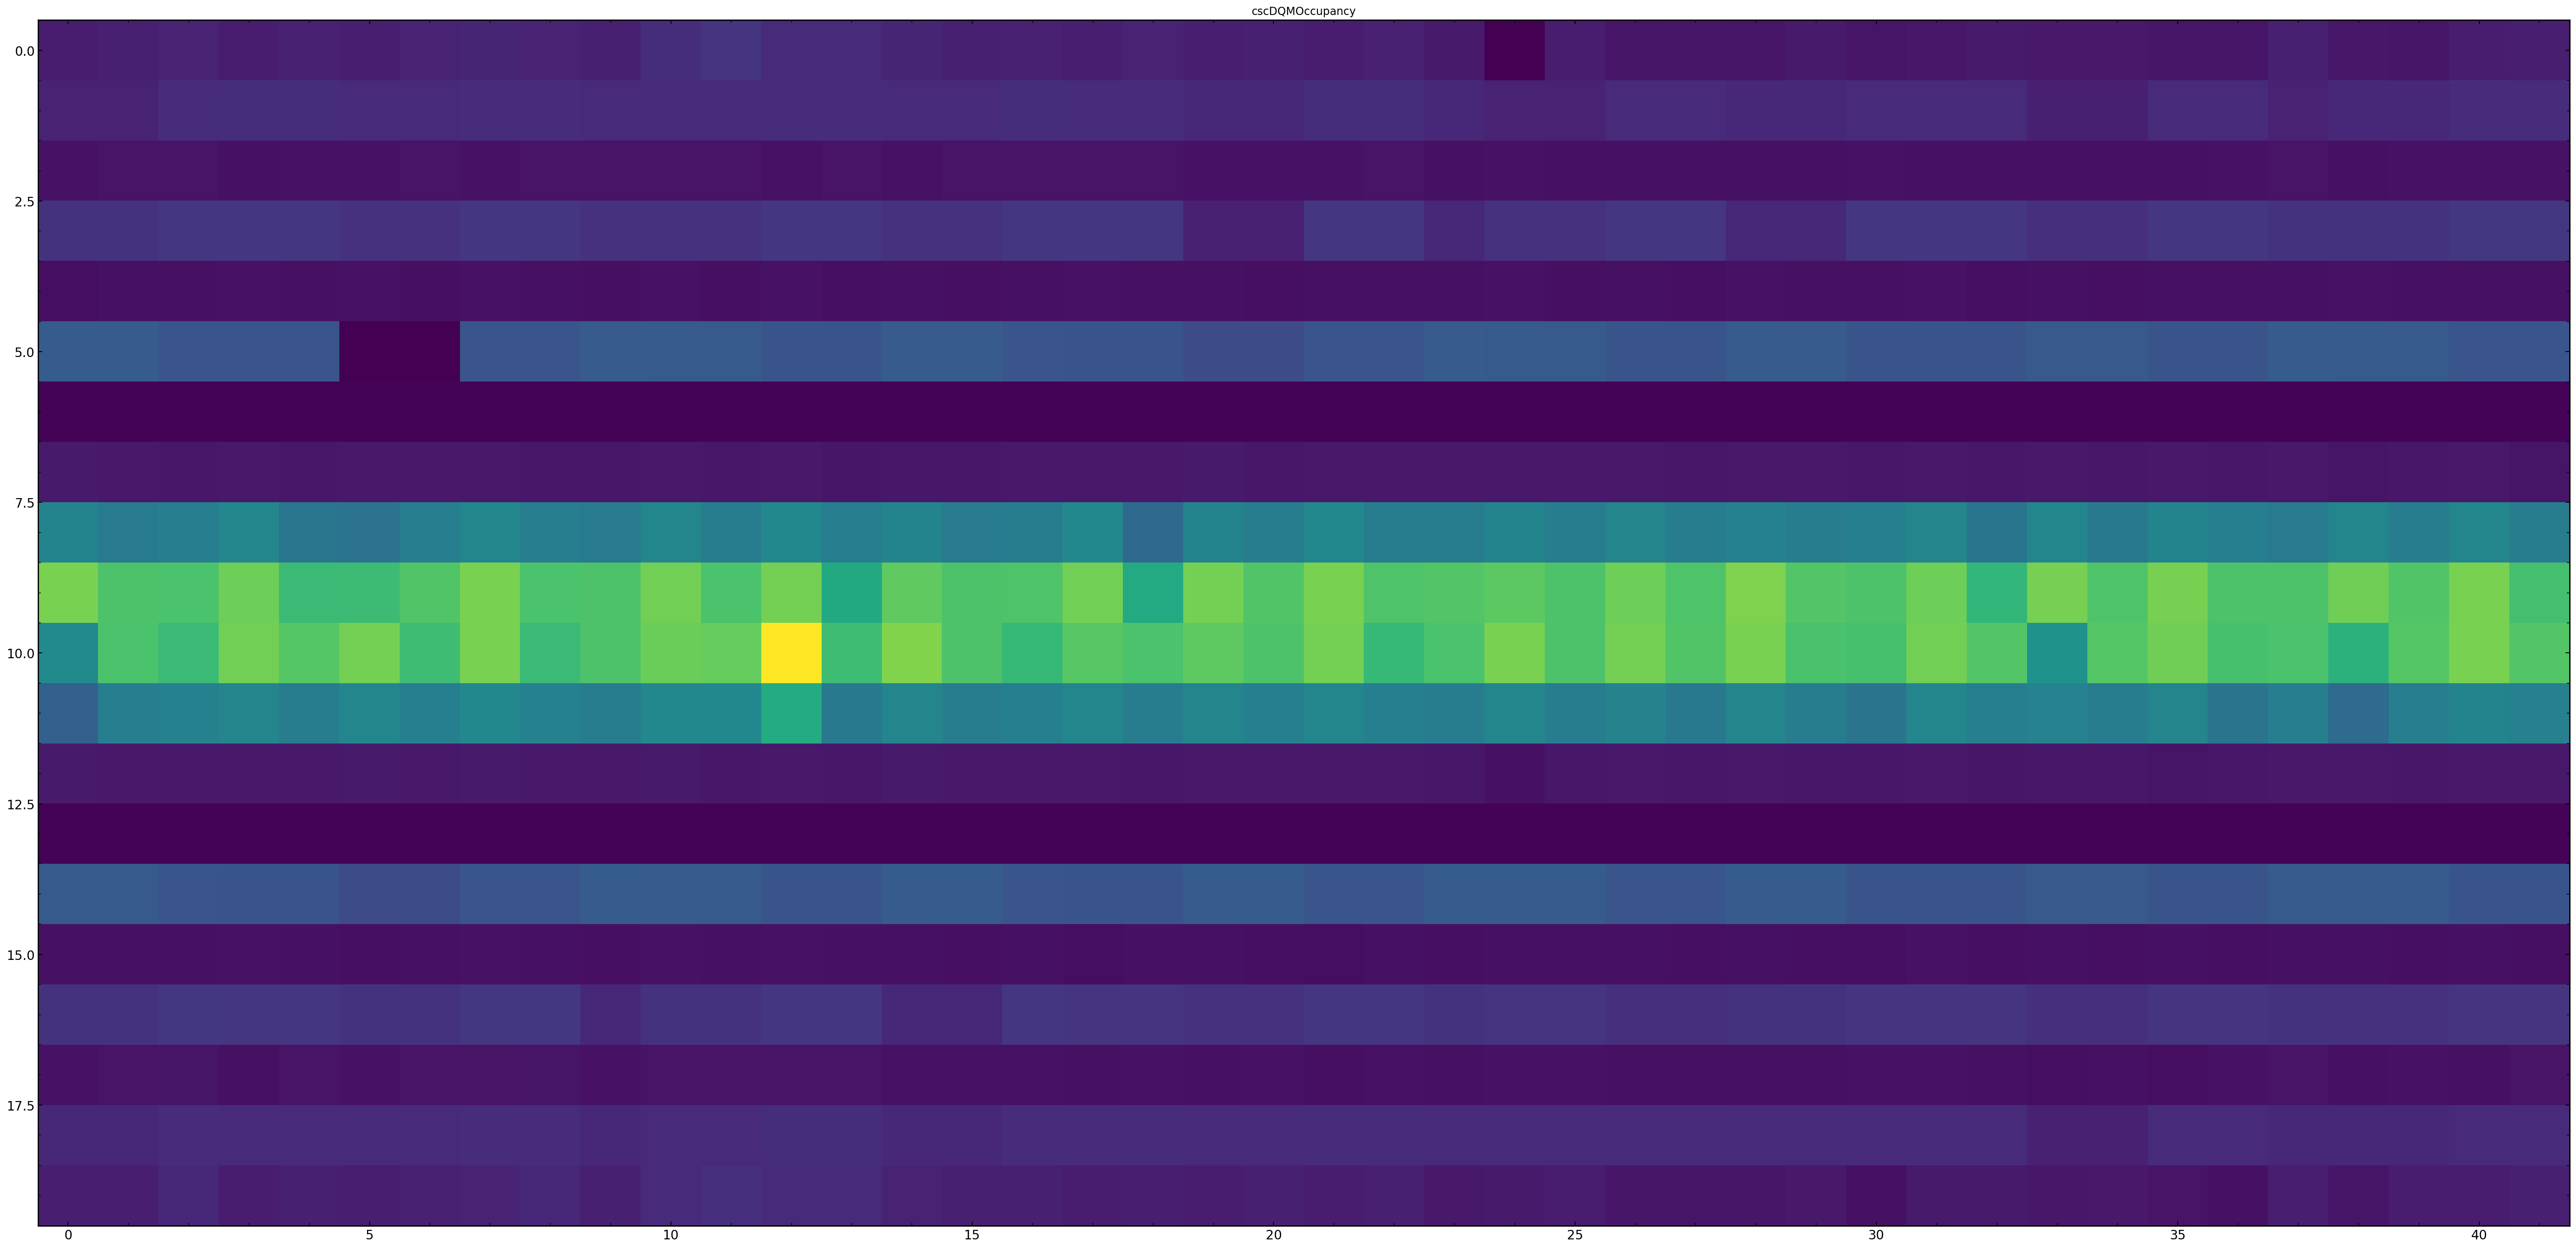

In [5]:
fig = plt.figure(figsize=(50, 50))

ax = fig.add_subplot(111)
ax.set_title('cscDQMOccupancy')
hist2 = np.swapaxes(hist2,0,1)
plt.imshow(hist2)
plt.show()


In [6]:
histtotal = []
histtotal_wire = []
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    if  "CSCInput/cscChamberStrip" in name:
        print(name)
        hist = roothist.numpy()
        hist2 = np.array(hist[0])
        #print(hist2)
        summed = []
        for value in hist2:
            summed.append(np.sum(value))
        ave = np.average(summed)
        #print(ave)
        norm = summed / ave
        for value in norm:
            histtotal.append(value)
    if  "CSCInput/cscChamberWire" in name:
        print(name)
        hist_wire = roothist.numpy()
        hist2_wire = np.array(hist_wire[0])
        #print(hist2_wire)
        summed_wire = []
        for value in hist2_wire:
            summed_wire.append(np.sum(value))
        ave_wire = np.average(summed_wire)
        #print(ave_wire)
        norm_wire = summed_wire #/ ave_wire
        for value in norm_wire:
            histtotal_wire.append(value)
        #hist2 = np.swapaxes(hist2,0,1)
        #histtotal.append(hist2)
#histtotal = np.hstack(histtotal , axis=0 )

CSCInput/cscChamberStripMENeg11a
CSCInput/cscChamberStripMENeg11b
CSCInput/cscChamberStripMENeg12
CSCInput/cscChamberStripMENeg13
CSCInput/cscChamberStripMENeg21
CSCInput/cscChamberStripMENeg22
CSCInput/cscChamberStripMENeg31
CSCInput/cscChamberStripMENeg32
CSCInput/cscChamberStripMENeg41
CSCInput/cscChamberStripMENeg42
CSCInput/cscChamberStripMEPos11a
CSCInput/cscChamberStripMEPos11b
CSCInput/cscChamberStripMEPos12
CSCInput/cscChamberStripMEPos13
CSCInput/cscChamberStripMEPos21
CSCInput/cscChamberStripMEPos22
CSCInput/cscChamberStripMEPos31
CSCInput/cscChamberStripMEPos32
CSCInput/cscChamberStripMEPos41
CSCInput/cscChamberStripMEPos42
CSCInput/cscChamberWireMENeg11a
CSCInput/cscChamberWireMENeg11b
CSCInput/cscChamberWireMENeg12
CSCInput/cscChamberWireMENeg13
CSCInput/cscChamberWireMENeg21
CSCInput/cscChamberWireMENeg22
CSCInput/cscChamberWireMENeg31
CSCInput/cscChamberWireMENeg32
CSCInput/cscChamberWireMENeg41
CSCInput/cscChamberWireMENeg42
CSCInput/cscChamberWireMEPos11a
CSCInput/csc

In [7]:
XY=zip(histtotal,histtotal_wire)
thing = []
for value in XY:
    thing.append(value)

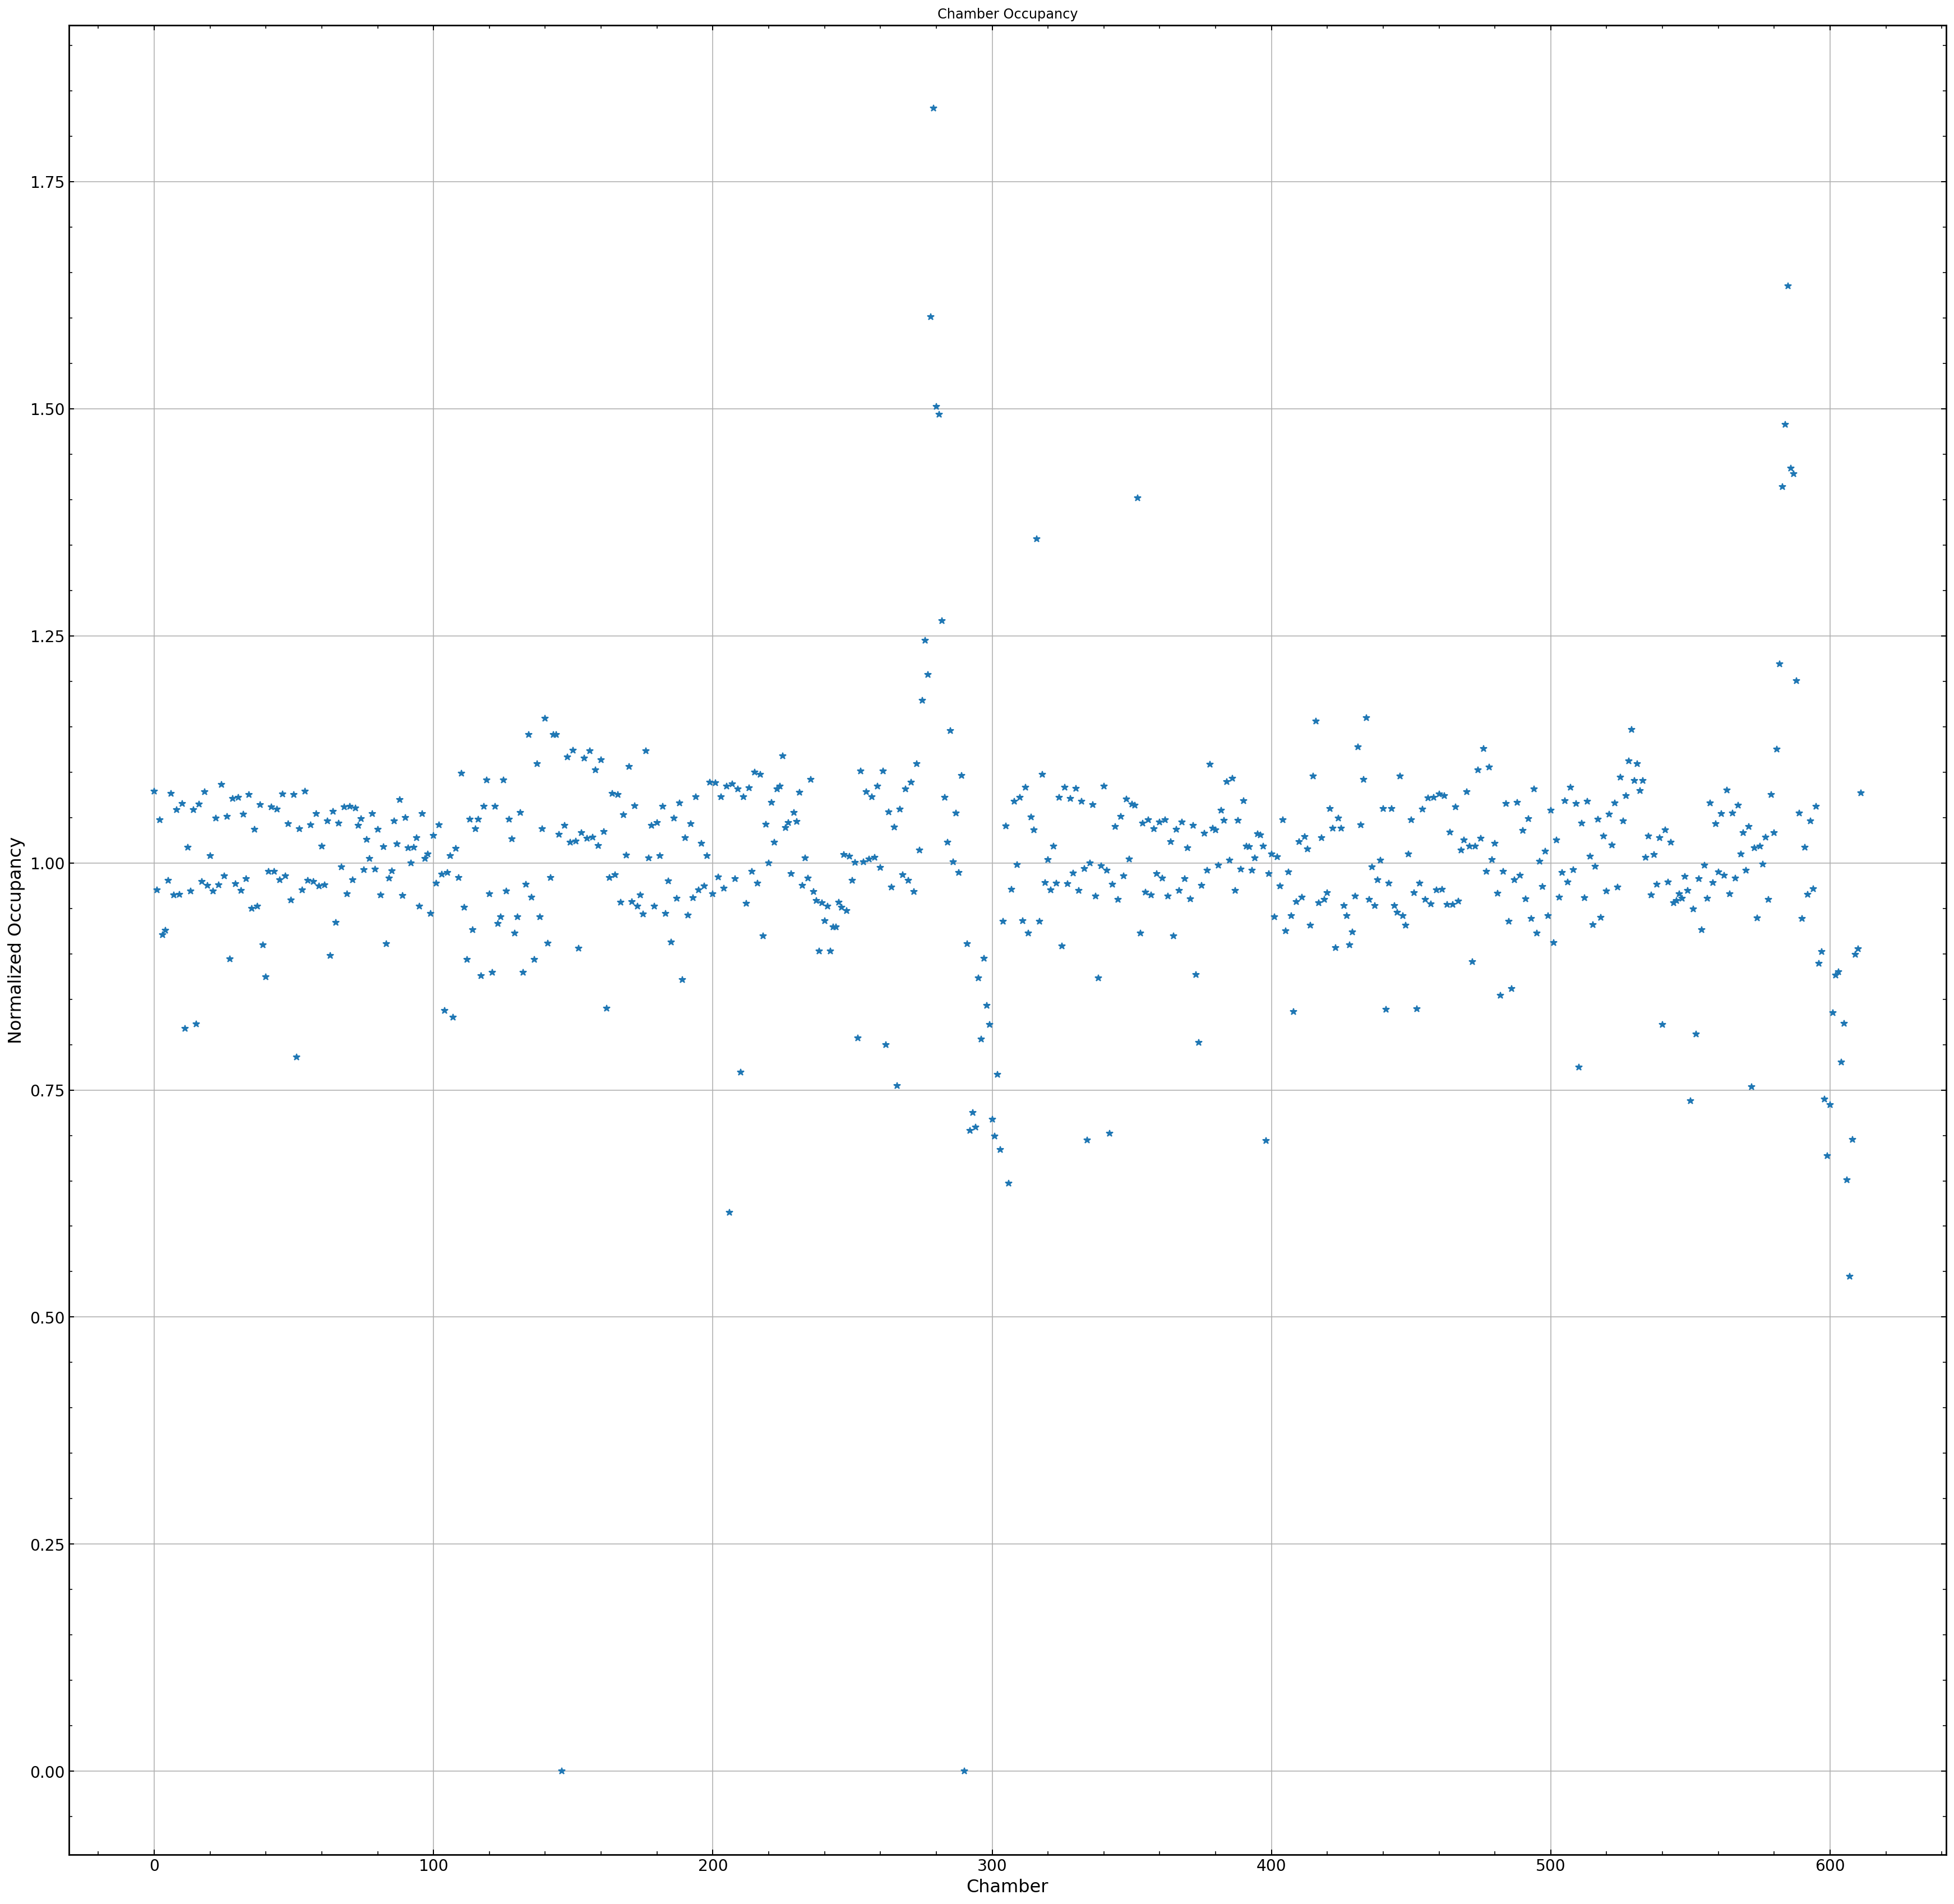

In [8]:
#ave = np.average(summed)
#norm = summed / ave
fig = plt.figure(figsize=(30, 30))
plt.plot(histtotal,'*')
plt.grid()
plt.xlabel('Chamber');
plt.ylabel('Normalized Occupancy');
plt.title('Chamber Occupancy');
plt.show()

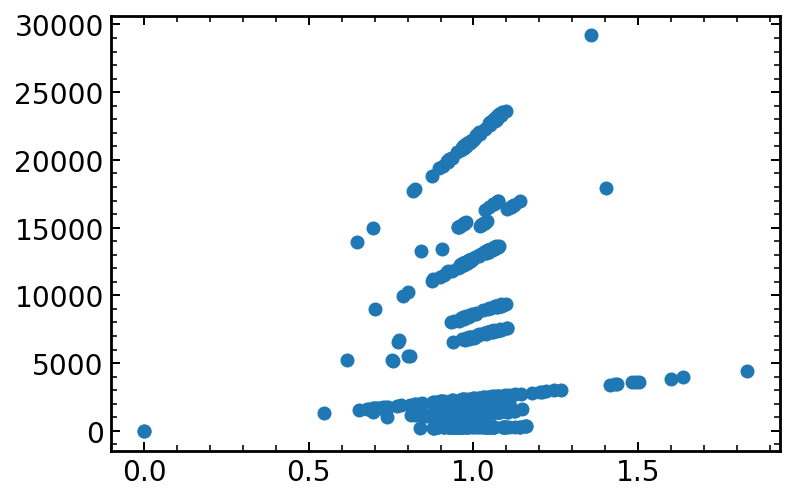

In [9]:
plt.scatter(histtotal,histtotal_wire)

In [10]:
XY = np.array(XY)
XY

array(<zip object at 0x7fc97305d550>, dtype=object)

In [11]:
XY = np.array(XY)
from sklearn.preprocessing import StandardScaler
thing = StandardScaler().fit_transform(thing)
db = DBSCAN(eps=0.5, min_samples=2).fit(thing)

In [12]:
labels = db.labels_

In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(thing, labels))

Estimated number of clusters: 8
Estimated number of noise points: 6
Silhouette Coefficient: 0.352


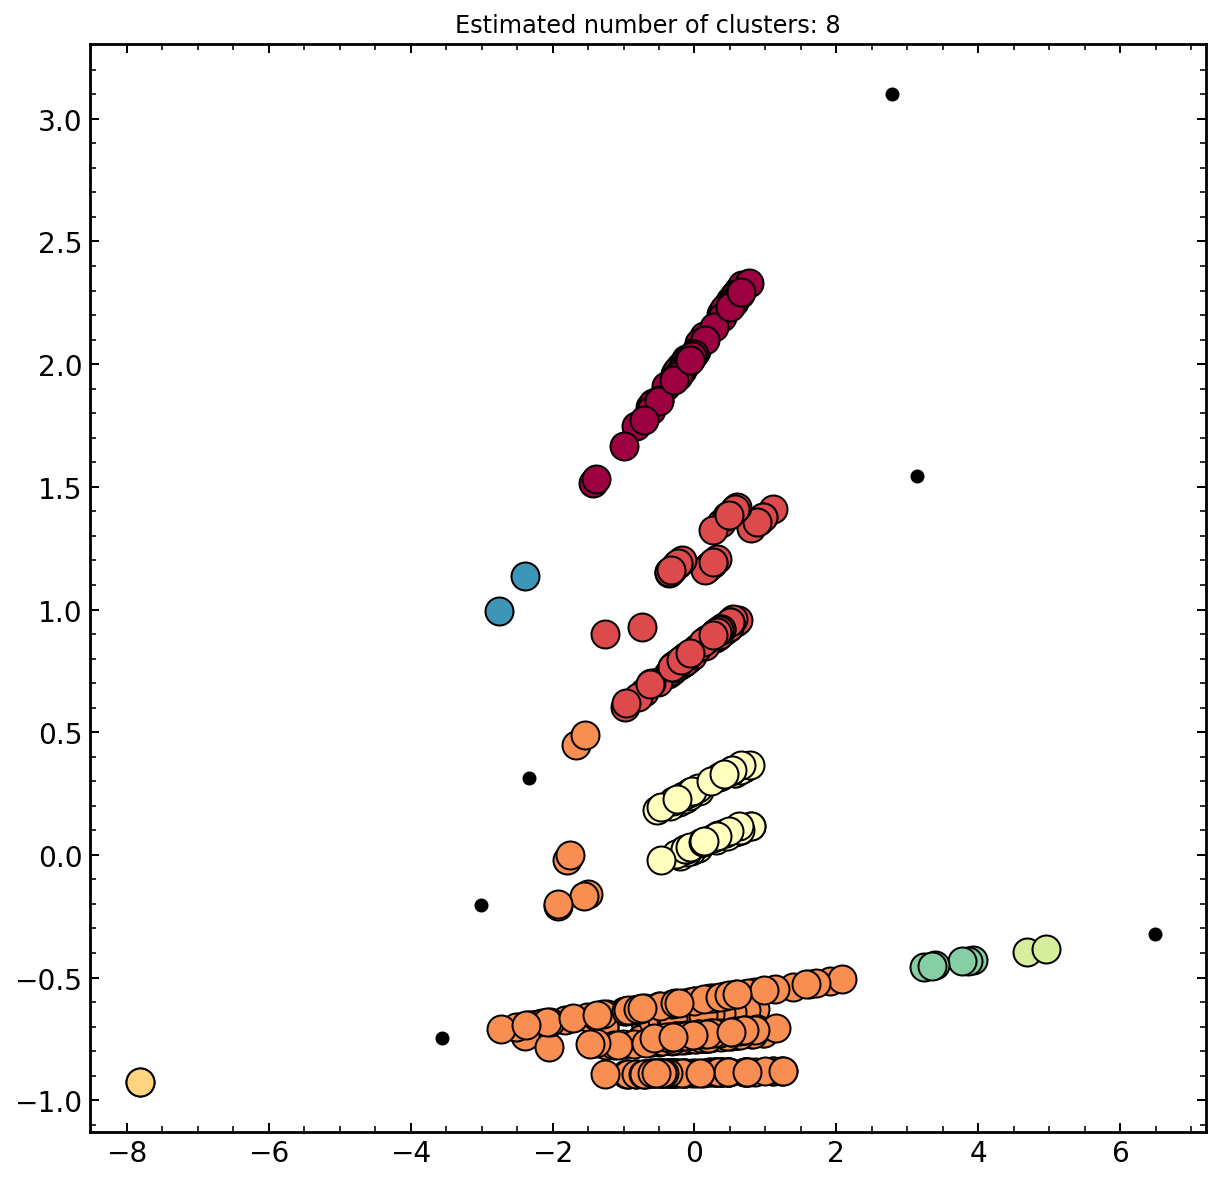

In [14]:
fig = plt.figure(figsize=(10, 10))
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = thing[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = thing[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [15]:
histtotal = []
histtotal_wire = []
for name, roothist in histograms:
    name = name.decode("utf-8")
    name = name.replace(";1", "")
    if  "cscDQMOccupancy" in name:
    #if  "CSC_Reporting" in name: 
    #if  "CSC_wo_ALCT" in name: 
        hist_occ = roothist.numpy()
        hist_occ = np.array(hist_occ[0])
        hist_occ = np.swapaxes(hist_occ,0,1)
    if  "Timing/cscTimingTotal" in name:
    #if  "CSC_wo_CLCT" in name:
        hist_BX0 = roothist.numpy()
        hist_BX0 = np.array(hist_BX0[0])
        hist_BX0 = np.swapaxes(hist_BX0,0,1)

In [16]:
large_array_occ = []
large_array_BX0 = []
for ME in hist_occ:
    #ave = np.average(ME)
    for value in ME:
        large_array_occ.append(value)
for ME in hist_BX0:
    #ave = np.average(ME)
    for value in ME:
        large_array_BX0.append(value)

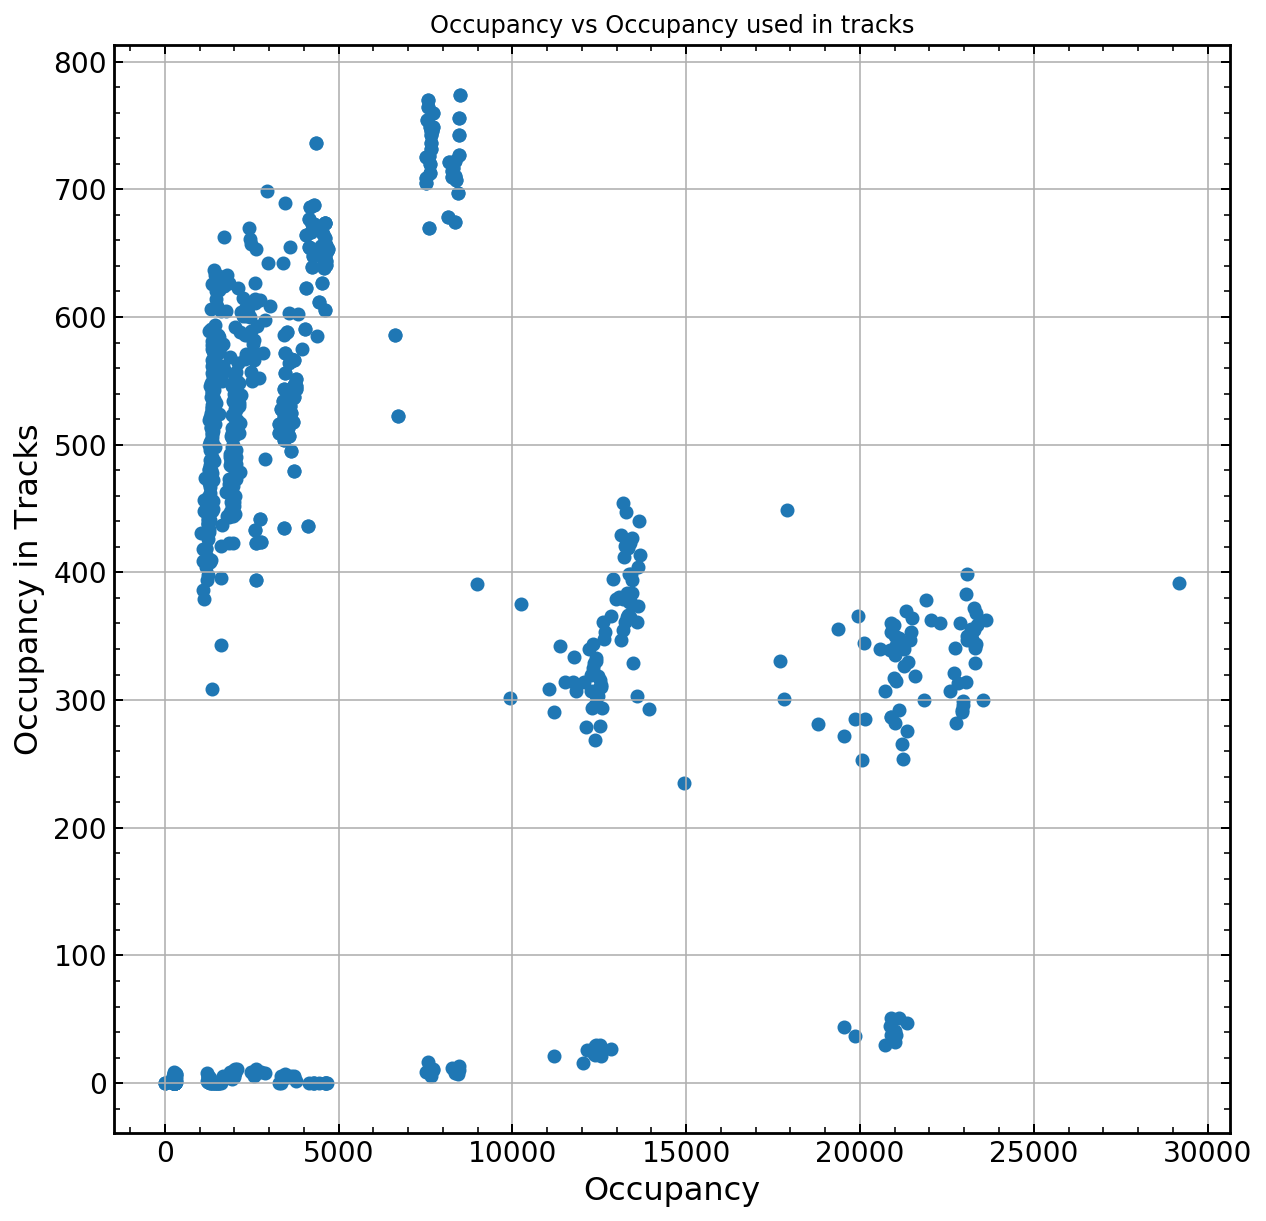

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(large_array_occ,large_array_BX0)
plt.grid()
plt.xlabel('Occupancy');
plt.ylabel('Occupancy in Tracks');
plt.title('Occupancy vs Occupancy used in tracks');
plt.show()

In [18]:
XY=zip(large_array_occ,large_array_BX0)
X = []
for value in XY:
    #print(value)
    X.append(value)

In [19]:
XY = np.array(X)
from sklearn.preprocessing import StandardScaler
XY = StandardScaler().fit_transform(XY)
db = DBSCAN(eps=0.2, min_samples=5).fit(XY)
labels = db.labels_

In [20]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(XY, labels))

Estimated number of clusters: 8
Estimated number of noise points: 14
Silhouette Coefficient: 0.663


(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)
(0.8662821991541715, 0.2901191849288735, 0.2978085351787774, 1.0)
(0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0)
(0.9951557093425606, 0.8322952710495963, 0.5063437139561706, 1.0)
(0.998077662437524, 0.9992310649750096, 0.7460207612456747, 1.0)
(0.8384467512495197, 0.9349480968858133, 0.6089965397923875, 1.0)
(0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0)
(0.24006151480199925, 0.58239138792772, 0.7208765859284891, 1.0)
(0, 0, 0, 1)


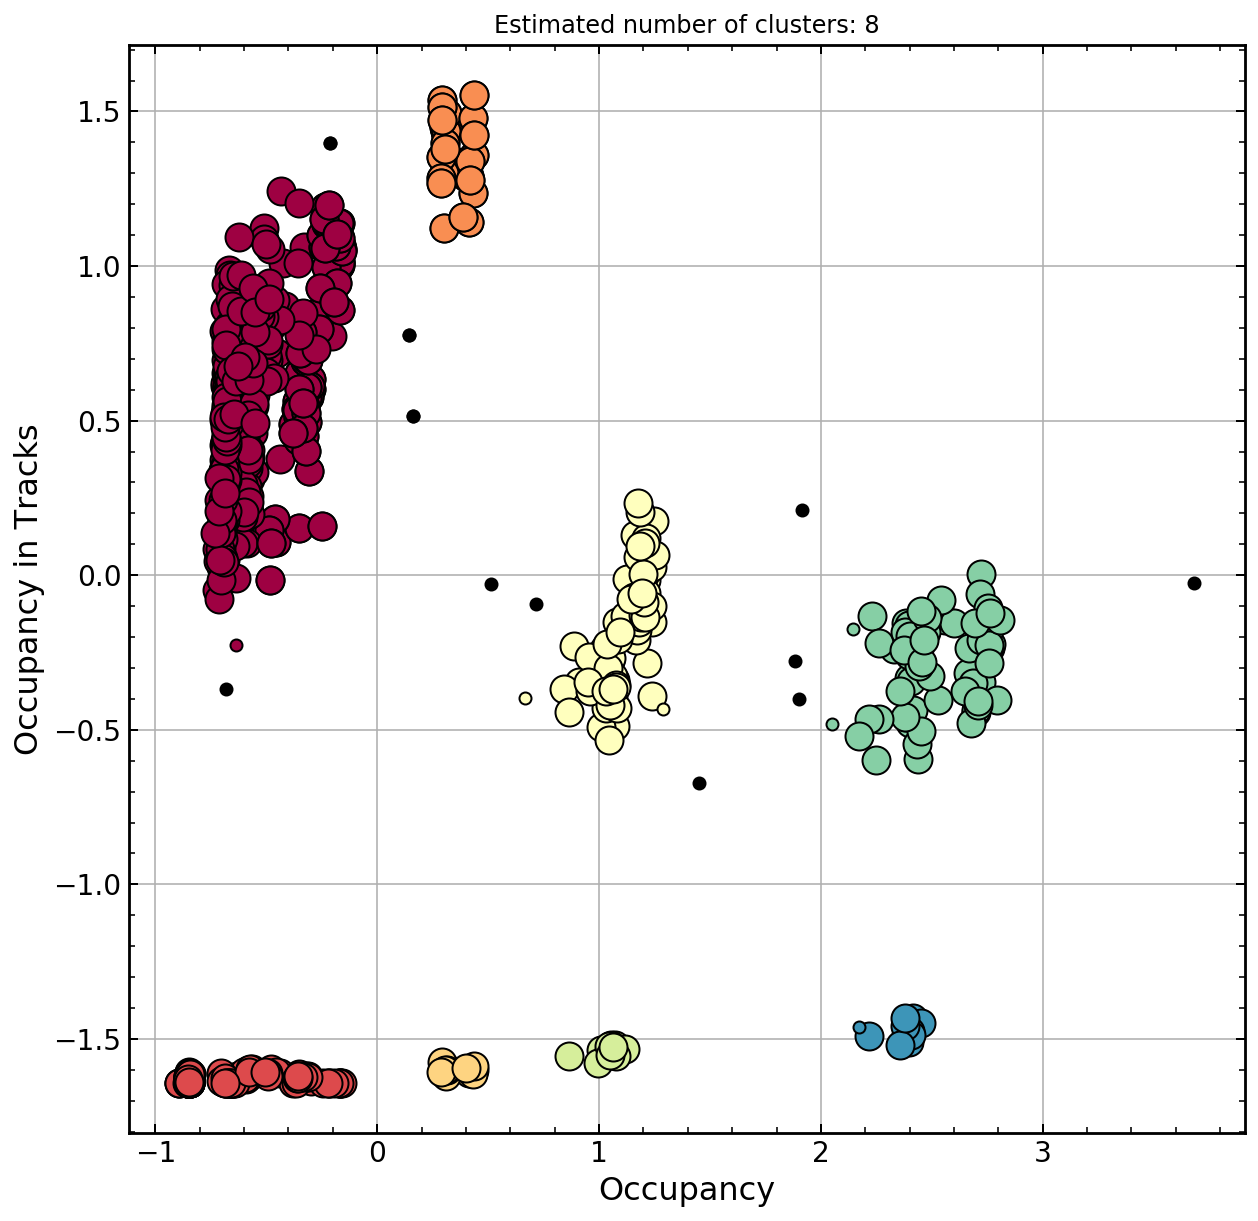

In [21]:
fig = plt.figure(figsize=(10, 10))
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = XY[class_member_mask & core_samples_mask]
    print(tuple(col))
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = XY[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.xlabel('Occupancy')
plt.ylabel('Occupancy in Tracks')
plt.show()